In [1]:
# 1. Uploading data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_bank_transactions = pd.read_csv(r'C:\Users\Admin\Desktop\bank_transactions.csv', sep=',')
df_bank_transactions

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01,deposit,500.0,completed
1,2,102.0,2025-07-01,withdrawal,200.0,completed
2,3,103.0,2025-07-02,deposit,1500.0,completed
3,4,101.0,2025-07-02,withdrawal,100.0,failed
4,5,104.0,2025-07-03,deposit,2500.0,completed
5,6,102.0,2025-07-04,withdrawal,800.0,completed
6,7,105.0,2025-07-05,deposit,1000.0,completed
7,8,101.0,2025-07-06,deposit,2000.0,completed
8,9,103.0,2025-07-06,withdrawal,300.0,completed
9,10,104.0,2025-07-07,withdrawal,1200.0,failed


In [4]:
row_count = len(df_bank_transactions)
print(f"Number of rows: {row_count}")

Number of rows: 20


In [5]:
# 2. Cleaning data

In [6]:
# I need to find out how many missing numbers are in each column using isnull()
print(df_bank_transactions.isnull().sum())

transaction_id      0
customer_id         1
transaction_date    1
transaction_type    0
amount              1
status              0
dtype: int64


In [7]:
# I need to remove the rows where the data are missing using dropna()
df_cleaned = df_bank_transactions.dropna()
df_cleaned

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01,deposit,500.0,completed
1,2,102.0,2025-07-01,withdrawal,200.0,completed
2,3,103.0,2025-07-02,deposit,1500.0,completed
3,4,101.0,2025-07-02,withdrawal,100.0,failed
4,5,104.0,2025-07-03,deposit,2500.0,completed
5,6,102.0,2025-07-04,withdrawal,800.0,completed
6,7,105.0,2025-07-05,deposit,1000.0,completed
7,8,101.0,2025-07-06,deposit,2000.0,completed
8,9,103.0,2025-07-06,withdrawal,300.0,completed
9,10,104.0,2025-07-07,withdrawal,1200.0,failed


In [8]:
# I need to verify the cleaned data.
print(df_cleaned.isnull().sum())

transaction_id      0
customer_id         0
transaction_date    0
transaction_type    0
amount              0
status              0
dtype: int64


In [9]:
# After using dropna(). There should be 17 entries, not 20. 
row_count = len(df_cleaned)
print(f"Number of rows: {row_count}")

Number of rows: 17


In [10]:
df_cleaned

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01,deposit,500.0,completed
1,2,102.0,2025-07-01,withdrawal,200.0,completed
2,3,103.0,2025-07-02,deposit,1500.0,completed
3,4,101.0,2025-07-02,withdrawal,100.0,failed
4,5,104.0,2025-07-03,deposit,2500.0,completed
5,6,102.0,2025-07-04,withdrawal,800.0,completed
6,7,105.0,2025-07-05,deposit,1000.0,completed
7,8,101.0,2025-07-06,deposit,2000.0,completed
8,9,103.0,2025-07-06,withdrawal,300.0,completed
9,10,104.0,2025-07-07,withdrawal,1200.0,failed


In [11]:
# I need to check whether there are duplicates in the transaction_id column. 
duplicates = df_cleaned[df_cleaned.duplicated(subset=['transaction_id'])]
print(duplicates)

Empty DataFrame
Columns: [transaction_id, customer_id, transaction_date, transaction_type, amount, status]
Index: []


In [12]:
# I need to check the whether each column has the same format. 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    17 non-null     int64  
 1   customer_id       17 non-null     float64
 2   transaction_date  17 non-null     object 
 3   transaction_type  17 non-null     object 
 4   amount            17 non-null     float64
 5   status            17 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 952.0+ bytes


In [13]:
# I need to check whether the amounts in the column "amount" have all positive amounts. 
# Firstly, I need to filter the negative amounts in the "amount" column. 
negative_amounts = df_cleaned[df_cleaned['amount'] < 0]
print(negative_amounts)

    transaction_id  customer_id transaction_date transaction_type  amount  \
16              17        101.0       2025-07-12          deposit  -500.0   

       status  
16  completed  


In [14]:
# I want to convert the negative amount to positive using absolute value function. 
df_cleaned.loc[:, 'amount'] = df_cleaned.loc[:,'amount'].abs()
df_cleaned

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01,deposit,500.0,completed
1,2,102.0,2025-07-01,withdrawal,200.0,completed
2,3,103.0,2025-07-02,deposit,1500.0,completed
3,4,101.0,2025-07-02,withdrawal,100.0,failed
4,5,104.0,2025-07-03,deposit,2500.0,completed
5,6,102.0,2025-07-04,withdrawal,800.0,completed
6,7,105.0,2025-07-05,deposit,1000.0,completed
7,8,101.0,2025-07-06,deposit,2000.0,completed
8,9,103.0,2025-07-06,withdrawal,300.0,completed
9,10,104.0,2025-07-07,withdrawal,1200.0,failed


In [15]:
# It seems that the transaction_date column contains different formats. I need to convert the dates to a uniform format
# using "pd.to_datetime()"
# I need to use ".loc" because it explicitly assign values to a column in a DataFrame ensuring that I'm modifiyng the original DataFrame. Otherwise the warning occurs, informing that I'm modyfiyng a view. 
# I need to use ":, 'transaction_date'". This means that I'm selecting the whole column. 

df_cleaned.loc[:, 'transaction_date'] = pd.to_datetime(
    df_cleaned.loc[:,'transaction_date'],
    format='%Y-%m-%d',
    errors='coerce'
)


In [16]:
# I need to verify whether the inserted date has correct format. It should be datetime64[ns]. 
print(df_cleaned['transaction_date'].dtype)


object


In [17]:
df_cleaned

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01 00:00:00,deposit,500.0,completed
1,2,102.0,2025-07-01 00:00:00,withdrawal,200.0,completed
2,3,103.0,2025-07-02 00:00:00,deposit,1500.0,completed
3,4,101.0,2025-07-02 00:00:00,withdrawal,100.0,failed
4,5,104.0,2025-07-03 00:00:00,deposit,2500.0,completed
5,6,102.0,2025-07-04 00:00:00,withdrawal,800.0,completed
6,7,105.0,2025-07-05 00:00:00,deposit,1000.0,completed
7,8,101.0,2025-07-06 00:00:00,deposit,2000.0,completed
8,9,103.0,2025-07-06 00:00:00,withdrawal,300.0,completed
9,10,104.0,2025-07-07 00:00:00,withdrawal,1200.0,failed


In [18]:
# I want to get rid of the "failed" status using filter out the rows where the "status" is failed. 
df_cleaned = df_cleaned[df_cleaned['status'] != 'failed']
df_cleaned

,transaction_id,customer_id,transaction_date,transaction_type,amount,status
0,1,101.0,2025-07-01 00:00:00,deposit,500.0,completed
1,2,102.0,2025-07-01 00:00:00,withdrawal,200.0,completed
2,3,103.0,2025-07-02 00:00:00,deposit,1500.0,completed
4,5,104.0,2025-07-03 00:00:00,deposit,2500.0,completed
5,6,102.0,2025-07-04 00:00:00,withdrawal,800.0,completed
6,7,105.0,2025-07-05 00:00:00,deposit,1000.0,completed
7,8,101.0,2025-07-06 00:00:00,deposit,2000.0,completed
8,9,103.0,2025-07-06 00:00:00,withdrawal,300.0,completed
10,11,106.0,2025-07-08 00:00:00,deposit,100.0,completed
13,14,109.0,2025-07-10 00:00:00,deposit,800.0,completed


In [19]:
# I need to check whether the formats in columns are correct. 
print(df_cleaned.dtypes)

transaction_id        int64
customer_id         float64
transaction_date     object
transaction_type     object
amount              float64
status               object
dtype: object


In [20]:
# As the transaction type (text) is object, I would like to change to format string. 
df_cleaned.loc[:,'transaction_type'] = df_cleaned.loc[:,'transaction_type'].astype('string')
print(df_cleaned['transaction_type'].dtype)

object


In [21]:
# As the customer_id is float64, I would like to change to format int64.
df_cleaned.loc[:, 'customer_id'] = df_cleaned.loc[:, 'customer_id'].apply(lambda x: int(x))

# Verify the change
print(df_cleaned['customer_id'].dtype)

float64


In [22]:
# As the status (text) is object, I would like to change to format string. But 
df_cleaned.loc[:, 'status'] = df_cleaned.loc[:,'status'].astype(pd.StringDtype())

# Verify the change
print(df_cleaned['status'].dtype)  # Should print 'string'

object


In [23]:
print(df_cleaned.dtypes)

transaction_id        int64
customer_id         float64
transaction_date     object
transaction_type     object
amount              float64
status               object
dtype: object


In [24]:
# 3. Analysis and Reporting

In [25]:
# Total amount deposited by each customer in the first half of July 2025. 
deposits_per_customer = df_cleaned[df_cleaned['transaction_type'] == 'deposit']
total_deposits_per_customer = deposits_per_customer.groupby('customer_id')['amount'].sum()

for customer_id, total_deposit in total_deposits_per_customer.items():
    total_deposit_int = int(total_deposit)
    print(f"The total deposit for customer {customer_id} is {total_deposit_int} EUR.")

The total deposit for customer 101.0 is 3000 EUR.
The total deposit for customer 103.0 is 1900 EUR.
The total deposit for customer 104.0 is 2500 EUR.
The total deposit for customer 105.0 is 1000 EUR.
The total deposit for customer 106.0 is 100 EUR.
The total deposit for customer 109.0 is 800 EUR.
The total deposit for customer 110.0 is 2000 EUR.


In [26]:
# Average transaction amount in the first half of July 2025. 
average_transaction_amount = df_cleaned['amount'].mean()

average_transaction_amount_rounded = round(average_transaction_amount, 2)

print(f"Average transaction amount: {average_transaction_amount_rounded} EUR")

Average transaction amount: 921.43 EUR


In [27]:
# I want to create a pivot table to show a amount of deposit and withdrawal for each date and customer. 

pivot_table = (
        df_cleaned
        .pivot_table(index=['customer_id', 'transaction_date'], columns='transaction_type', aggfunc={'amount':['sum']}, fill_value=0)
        .droplevel(0, axis='columns')
)

print(pivot_table)

                                 sum           
transaction_type             deposit withdrawal
customer_id transaction_date                   
101.0       2025-07-01         500.0        0.0
            2025-07-06        2000.0        0.0
            2025-07-12         500.0        0.0
102.0       2025-07-01           0.0      200.0
            2025-07-04           0.0      800.0
            2025-07-13           0.0      300.0
103.0       2025-07-02        1500.0        0.0
            2025-07-06           0.0      300.0
            2025-07-14         400.0        0.0
104.0       2025-07-03        2500.0        0.0
105.0       2025-07-05        1000.0        0.0
106.0       2025-07-08         100.0        0.0
109.0       2025-07-10         800.0        0.0


In [ ]:
# Visualization

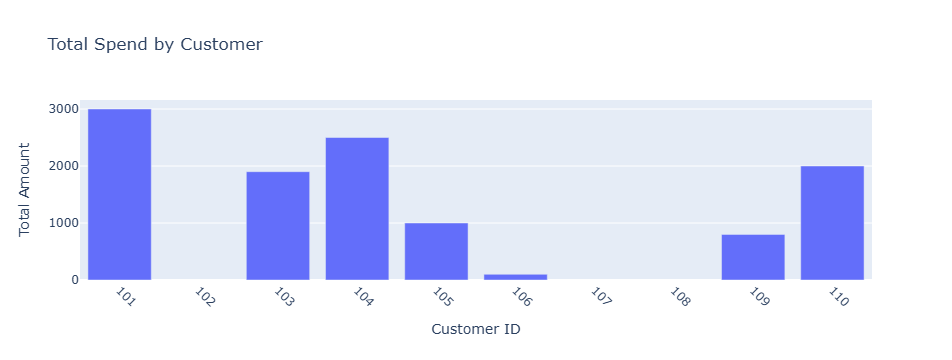

In [33]:
# Total spend by Customer using bar chart
# Bar chart can show the total amount deposits by each customer, which can help you identify high-value customers.

import plotly.express as px

total_spent_by_customer = df_cleaned[df_cleaned['transaction_type'] == 'deposit'].groupby('customer_id')['amount'].sum()

fig = px.bar(total_spent_by_customer, x=total_spent_by_customer.index, y=total_spent_by_customer.values, 
             title="Total Spend by Customer", labels={"x": "Customer ID", "y": "Total Amount"})

fig.update_layout(
    xaxis={'tickmode': 'linear',  
           'showticklabels': True,  
           'tickangle': 45},  
    xaxis_title="Customer ID",  
    yaxis_title="Total Amount"  
)

fig.show()

In [34]:
df_cleaned.to_csv('cleaned_bank_transactions.csv', index=False)

# Confirm the file was saved
print("Cleaned data saved as 'cleaned_bank_transactions.csv'")

Cleaned data saved as 'cleaned_bank_transactions.csv'
